Create a model to classify people as good or bad credit risks. 

### Notes:
* This is a classification problem
* Data source: https://archive-beta.ics.uci.edu/ml/datasets/statlog+german+credit+data 
* Steps:    
    1. Download the data
    2. Visualise the data
    3. (If needed) clean, normalise, transform and visualise the data to get a feeling about potential relationships between the variables
    4. Try to find the most relevant features (feature selection)
    5. Try to create new features
    6. Agree on a metric (i.e. Precision and recall)
    7. Develop a classification model (start with simple models and then grow in complexity)    
    8. Analyse the results for train + test data and compare different models

In [72]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



In [73]:
df = pd.read_csv('german.csv', sep = ' ')
df.columns = ['Account status', 'Duration', 'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment', 'Installment Rate', 'Status and sex', 'Other debtors/guarantors', 'Present residence since', 'Property', 'Age', 'Other installment plans', 'Housing', 'No of credits', 'Job', 'No of liabilities', 'Telephone', 'Foreign worker', 'Good/bad']
df.head()

,Account status,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment,Installment Rate,Status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,No of credits,Job,No of liabilities,Telephone,Foreign worker,Good/bad
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [74]:
def digits(string):
    num =  str(string)[1:]
    return int(num)

print(type(digits('A12')))

<class 'int'>


In [75]:
categ_col = ['Account status', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment', 'Status and sex', 'Other debtors/guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign worker']

for col in categ_col:
    df[col] = df[col].apply(digits)

df

,Account status,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment,Installment Rate,Status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,No of credits,Job,No of liabilities,Telephone,Foreign worker,Good/bad
0,12,48,32,43,5951,61,73,2,92,101,...,121,22,143,152,1,173,1,191,201,2
1,14,12,34,46,2096,61,74,2,93,101,...,121,49,143,152,1,172,2,191,201,1
2,11,42,32,42,7882,61,74,2,93,103,...,122,45,143,153,1,173,2,191,201,1
3,11,24,33,40,4870,61,73,3,93,101,...,124,53,143,153,2,173,2,191,201,2
4,14,36,32,46,9055,65,73,2,93,101,...,124,35,143,153,1,172,2,192,201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,14,12,32,42,1736,61,74,3,92,101,...,121,31,143,152,1,172,1,191,201,1
995,11,30,32,41,3857,61,73,4,91,101,...,122,40,143,152,1,174,1,192,201,1
996,14,12,32,43,804,61,75,4,93,101,...,123,38,143,152,1,173,1,191,201,1
997,11,45,32,43,1845,61,73,4,93,101,...,124,23,143,153,1,173,1,192,201,2


In [30]:
# categ_col = ['Account status', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment', 'Status and sex', 'Other debtors/guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign worker']

# for i in df[categ_col]:
#     df = df.replace(to_replace = ['A11','A12','A13', 'A14', 'A30','A31', 'A32', 'A33', 'A34', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46',
#     'A47', 'A48', 'A49', 'A410', 'A61', 'A62', 'A63', 'A64', 'A65', 'A71', 'A72', 'A73', 'A74', 'A75', 'A91', 'A92', 'A93', 'A94', 'A95',
#     'A101', 'A102', 'A103', 'A121', 'A122', 'A123', 'A124', 'A141', 'A142', 'A143', 'A151', 'A152', 'A153', 'A171', 'A172', 'A173', 'A174',
#     'A191', 'A192', 'A201', 'A202'], 
#     value = [11, 12, 13, 14, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 410, 61, 62, 63, 64, 65, 71, 72, 73, 74, 75, 
#     91, 92, 93, 94, 95, 101, 102, 103, 121, 122, 123, 124, 141, 142, 143, 151, 152, 153, 171, 172, 173, 174, 191, 192, 201, 202])

# df.head()




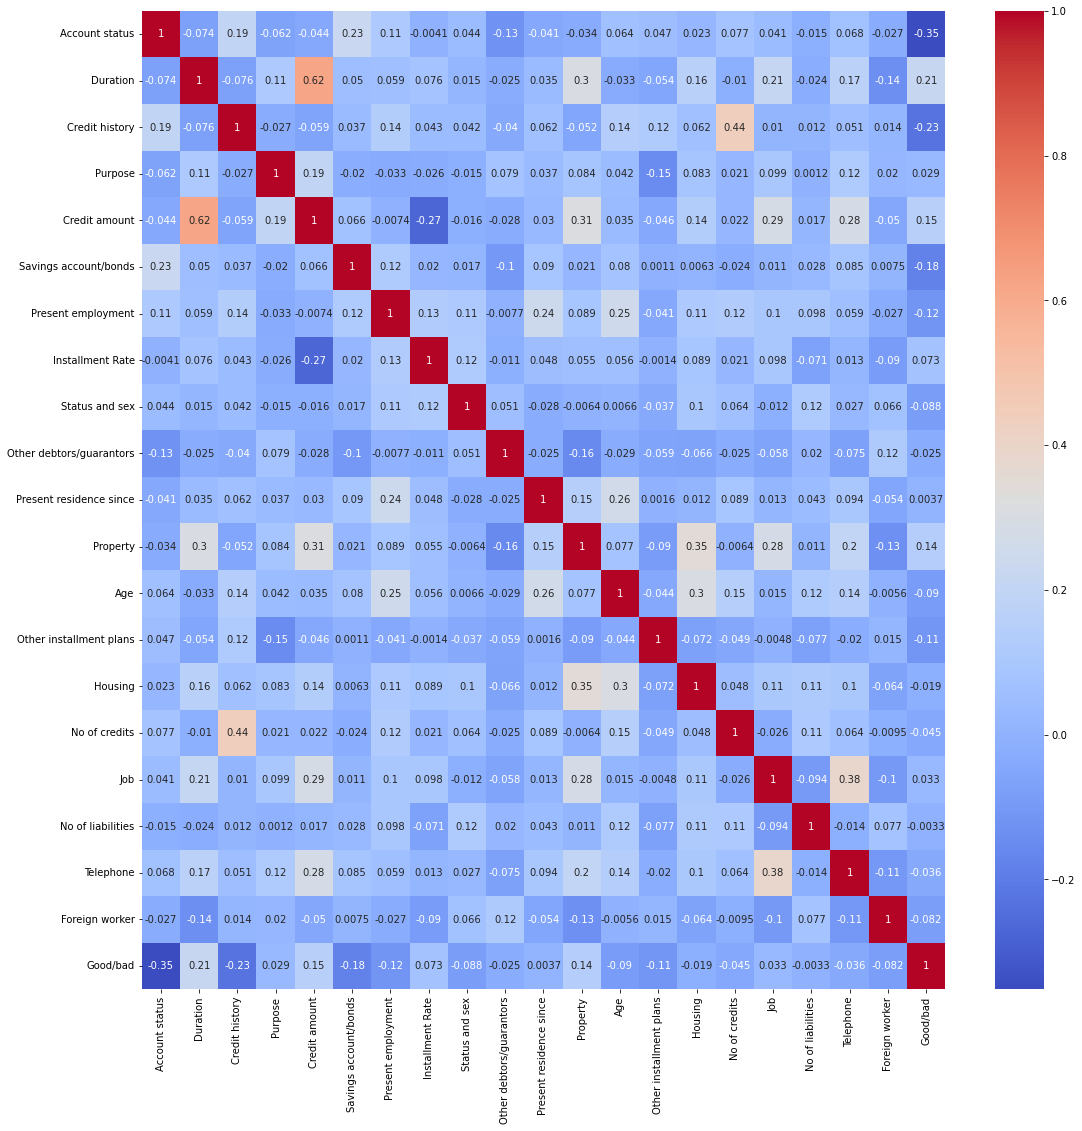

In [76]:
corr = df.corr()
plt.figure(figsize = (18, 18))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

In [77]:
cc = corr[abs(corr['Good/bad']) > 0.2].index

print('Number of correlated features is ', len(cc))
print('Most correlated features are: \n', cc)

Number of correlated features is  4
Most correlated features are: 
 Index(['Account status', 'Duration', 'Credit history', 'Good/bad'], dtype='object')


In [78]:
cols_to_drop = ['Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment', 'Property', 'Housing', 'Installment Rate', 'Status and sex', 'Other debtors/guarantors', 'Present residence since', 'Age', 'Other installment plans', 'No of credits', 'Job', 'No of liabilities', 'Telephone', 'Foreign worker']


df = df.drop(cols_to_drop, axis = 1)

df

,Account status,Duration,Credit history,Good/bad
0,12,48,32,2
1,14,12,34,1
2,11,42,32,1
3,11,24,33,2
4,14,36,32,1
...,...,...,...,...
994,14,12,32,1
995,11,30,32,1
996,14,12,32,1
997,11,45,32,2


In [79]:
x = df.drop(['Good/bad'], axis = 1)
y = df['Good/bad']

print(x.shape, y.shape)

(999, 3) (999,)


In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 3)
(799,)
(200, 3)
(200,)


In [81]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [82]:
def evaluate(model):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    print('model name', model)
    print ('accuracy', accuracy)

In [83]:
lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier(max_depth = 6)
rf = RandomForestClassifier(max_samples = 0.9)
knn = KNeighborsClassifier(n_neighbors = 5)

models = [lr, svm, dt, rf, knn]

for model in models:
    evaluate(model)

model name LogisticRegression()
accuracy 0.7
model name SVC()
accuracy 0.72
model name DecisionTreeClassifier(max_depth=6)
accuracy 0.705
model name RandomForestClassifier(max_samples=0.9)
accuracy 0.715
model name KNeighborsClassifier()
accuracy 0.725


In [84]:
base_models = [('RF', RandomForestClassifier(max_samples = 0.9)), ('KNN', KNeighborsClassifier(n_neighbors = 5))]
meta_model = SVC()
stacking_model = StackingClassifier(estimators = base_models, final_estimator = meta_model, passthrough = True, cv = 3)

In [85]:
stacking_model.fit(X_train, y_train)
stacking_model.score(X_test, y_test)

0.715

<AxesSubplot:>

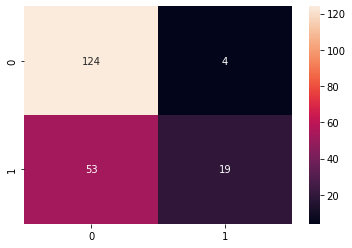

In [86]:
y_pred = stacking_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.97      0.81       128
           2       0.83      0.26      0.40        72

    accuracy                           0.71       200
   macro avg       0.76      0.62      0.61       200
weighted avg       0.75      0.71      0.66       200



In [ ]:
''''A11' = 11
'A12' = 12
'A13' = 13
'A14' = 14
'A30' = 30
'A31' = 31
'A32' = 32
'A33' = 33
'A34' = 34
'A40' = 40
'A41' = 41
'A42' = 42
'A43' = 43
'A44' = 44
'A45' = 45
'A46' = 46
'A47' = 47
'A48' = 48
'A49' = 49
'A410' = 410
'A61' = 61
'A62' = 62
'A63' = 63
'A64' = 64
'A65' = 65
'A71' = 71
'A72' = 72
'A73' = 73
'A74' = 74
'A75' = 75
'A91' = 91
'A92' = 92
'A93' = 93
'A94' = 94
'A95' = 95
'A101' = 101
'A102' = 102
'A103' = 103
'A121' = 121
'A122' = 122
'A123' = 123
'A124' = 124
'A141' = 141
'A142' = 142
'A143' = 143
'A151' = 151
'A152' = 152
'A153' = 153
'A171' = 171
'A172' = 172
'A173' = 173
'A174' = 174
'A191' = 191
'A192' = 192
'A201' = 201
'A202' = 202'''